In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')


In [41]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      19230 non-null  object
 1   Year      18522 non-null  object
 2   Duration  9021 non-null   object
 3   Genre     16871 non-null  object
 4   Rating    9795 non-null   object
 5   Votes     9796 non-null   object
 6   Director  18604 non-null  object
 7   Actor 1   17221 non-null  object
 8   Actor 2   16247 non-null  object
 9   Actor 3   15322 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [43]:
df.isna().sum()

,0
Name,0
Year,708
Duration,10209
Genre,2359
Rating,9435
Votes,9434
Director,626
Actor 1,2009
Actor 2,2983
Actor 3,3908


In [44]:
df.describe().T

,count,unique,top,freq
Name,19230,13839,Zindagi,12
Year,18522,103,(2019),519
Duration,9021,183,120 min,310
Genre,16871,486,Drama,3509
Rating,9795,85,6.8,345
Votes,9796,2035,9,289
Director,18604,5938,Jayant Desai,76
Actor 1,17221,4718,Ashok Kumar,194
Actor 2,16247,4891,Rekha,95
Actor 3,15322,4820,Pran,104


In [45]:
df['Year'].head()

,Year
0,NaN
1,(2019)
2,(2021)
3,(2019)
4,(2010)


In [46]:
df['Year'].unique() #checking for non-numerical values in year column

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [47]:
#converting year column into numerical
df['Year']=df['Year'].str.replace(' ','')
#extracting only numeric part of the 'Year' column using str.extract
df['Year'] = df['Year'].str.replace(r'[^\d]', '', regex=True)
df['Year']=pd.to_numeric(df['Year'])

In [48]:
df['Year'].unique()

array([  nan, 2019., 2021., 2010., 1997., 2005., 2008., 2012., 2014.,
       2004., 2016., 1991., 1990., 2018., 1987., 1948., 1958., 2017.,
       2020., 2009., 2002., 1993., 1946., 1994., 2007., 2013., 2003.,
       1998., 1979., 1951., 1956., 1974., 2015., 2006., 1981., 1985.,
       2011., 2001., 1967., 1988., 1995., 1959., 1996., 1970., 1976.,
       2000., 1999., 1973., 1968., 1943., 1953., 1986., 1983., 1989.,
       1982., 1977., 1957., 1950., 1992., 1969., 1975., 1947., 1972.,
       1971., 1935., 1978., 1960., 1944., 1963., 1940., 1984., 1934.,
       1955., 1936., 1980., 1966., 1949., 1962., 1964., 1952., 1933.,
       1942., 1939., 1954., 1945., 1961., 1965., 1938., 1941., 1931.,
       1937., 2022., 1932., 1923., 1915., 1928., 1922., 1917., 1913.,
       1930., 1926., 1914., 1924.,   43.])

In [49]:
df['Votes'].unique() #looking at the votes column

array([nan, '8', '35', ..., '408', '1,496', 'Shweta Bhardwaj'],
      dtype=object)

In [52]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [53]:
df['Votes'].fillna(df['Votes'].median(),inplace=True) #filling the nan values with median values

In [54]:
#looking at the duration column
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [55]:
df['Duration'] = df['Duration'].str.extract(r'(\d+)')

In [56]:
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [57]:

df['Duration'].fillna(df['Duration'].median(),inplace=True)

In [69]:
df['Rating'].unique()

array([nan, '7.0', '4.4', '4.7', '7.4', '5.6', '4.0', '6.2', '5.9', '6.5',
       '5.7', '6.3', '7.2', '6.6', '7.3', '7.1', '6.9', '3.5', '5.0',
       '4.5', '6.4', '4.1', '4.8', '8.1', '5.5', '6.8', '6.1', '7.7',
       '5.1', '7.6', '3.1', '3.3', '7.8', '8.4', '5.2', '4.3', '5.8',
       '4.6', '7.5', '6.7', '3.6', '3.9', '5.4', '4.2', '5.3', '3.4',
       '3.0', '8.0', '6.0', '3.8', '7.9', '2.7', '4.9', '2.4', '3.7',
       '3.2', '2.5', '2.8', '2.6', '2.9', '8.2', '8.7', '8.3', '9.3',
       '8.8', '2.1', '2.3', '8.5', '8.6', '9.0', '9.6', '1.7', '9.1',
       '2.0', '1.4', '8.9', '1.9', '9.4', '9.7', '1.8', '9.2', '1.6',
       '10.0', '2.2', '1.1', None], dtype=object)

In [70]:
df.loc[df['Rating'] == 'Shiva Rindani'] = None #replacing the only string value in Rating column to nan considering it as an outlier

In [71]:
df['Rating'].fillna("6.8", inplace = True) #replacing the nan values of Rating column by 6.8 as it's the most frequently occuring value

In [72]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,130.0,Drama,6.8,36.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.8,36.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.8,36.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


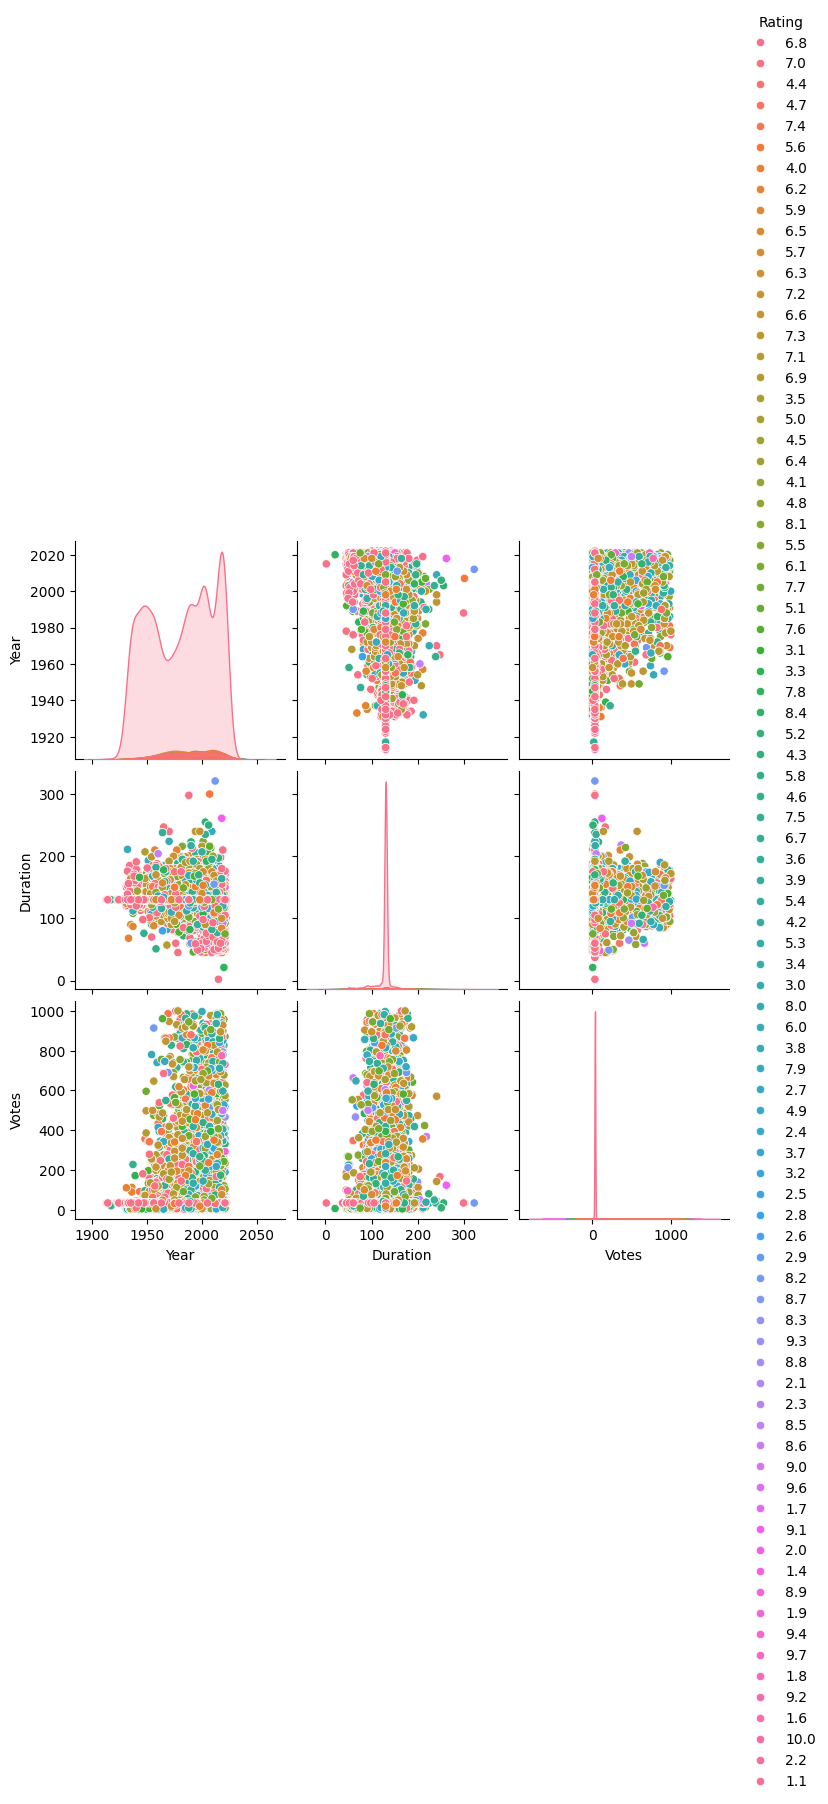

In [73]:
sns.pairplot(df,hue='Rating')

##from the pairplot, it seems that the rating column is dependent on year, duration, and votes

In [74]:
#choosing only numerical columns for correlation plot
df1=df[['Year','Duration','Votes','Rating']]
df1.head()

,Year,Duration,Votes,Rating
0,NaN,130.0,36.0,6.8
1,2019.0,109.0,8.0,7.0
2,2021.0,90.0,36.0,6.8
3,2019.0,110.0,35.0,4.4
4,2010.0,105.0,36.0,6.8


<Axes: >

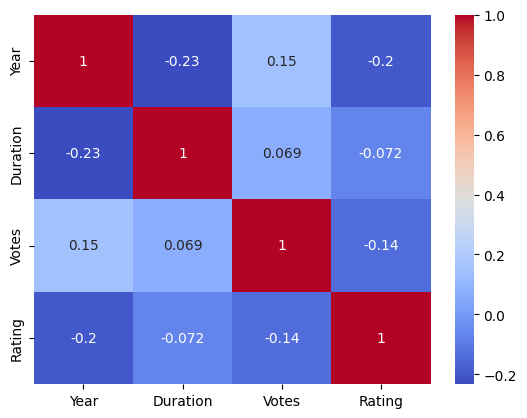

In [76]:
#plotting the correlation of only numerical columns
plt.figure()
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

##year seems to have high correlation with rating


In [77]:
#splitting the genre column into 3 parts and dropping the original one
df[["Genre_1","Genre_2","Genre_3"]] = df['Genre'].str.split(',', n = 3, expand=True)
df = df.drop(['Genre'], axis=1)

In [78]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
0,,NaN,130.0,6.8,36.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,2021.0,90.0,6.8,36.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,2010.0,105.0,6.8,36.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None


In [79]:
#printing the list of unique genre
g_l1=df.Genre_1.unique()
g_l2=df.Genre_2.unique()
g_l3=df.Genre_3.unique()
g_l=list(g_l1)+list(g_l2)+list(g_l3)
g_l=[i for i in g_l if i]
print(g_l)

['Drama', 'Comedy', 'Documentary', 'Horror', 'Action', 'Thriller', nan, 'Crime', 'Biography', 'Adventure', 'War', 'Sport', 'Mystery', 'Musical', 'Romance', 'Family', 'Fantasy', 'Sci-Fi', 'Animation', 'Music', 'History', 'Reality-TV', ' Musical', ' Romance', ' Drama', ' Mystery', ' Crime', nan, ' Thriller', ' Horror', ' History', ' Family', ' Sci-Fi', ' Sport', ' Comedy', ' Adventure', ' Biography', ' Fantasy', ' Music', ' Action', ' War', ' News', ' Reality-TV', ' Short', ' Western', ' Musical', ' War', ' Thriller', ' Romance', nan, ' Fantasy', ' Family', ' Mystery', ' Sport', ' History', ' Drama', ' Music', ' Comedy', ' Crime', ' Horror', ' Sci-Fi', ' Adventure', ' News', ' Western', ' Action', ' Biography']


In [80]:
len(g_l)  #thus, there are a total of 66 genres

66

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      19229 non-null  object 
 1   Year      18521 non-null  float64
 2   Duration  19229 non-null  float64
 3   Rating    19230 non-null  object 
 4   Votes     19229 non-null  float64
 5   Director  18603 non-null  object 
 6   Actor 1   17221 non-null  object 
 7   Actor 2   16247 non-null  object 
 8   Actor 3   15322 non-null  object 
 9   Genre_1   16870 non-null  object 
 10  Genre_2   7672 non-null   object 
 11  Genre_3   4017 non-null   object 
dtypes: float64(3), object(9)
memory usage: 1.8+ MB


In [83]:
#converting g_l to a list of 15509 zeros according to the number of entries
l_zeros=[0]*19230
for genre in g_l:
  df[genre]=l_zeros
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,...,Adventure,Biography,Fantasy,Music,Action,War,News,Reality-TV,Short,Western
0,,NaN,130.0,6.8,36.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,2021.0,90.0,6.8,36.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,2010.0,105.0,6.8,36.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#setting the values of available genres to 1
for genre in g_l:
    for x in range(19230):
        if df.at[x, 'Genre_1'] == genre or df.at[x, 'Genre_2'] == genre or df.at[x, 'Genre_3'] == genre:
            df.at[x, genre] = 1

In [85]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,...,Adventure,Biography,Fantasy,Music,Action,War,News,Reality-TV,Short,Western
0,,NaN,130.0,6.8,36.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,2021.0,90.0,6.8,36.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,2010.0,105.0,6.8,36.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,...,0,0,0,0,0,0,0,0,0,0


(66.0, 0.0)

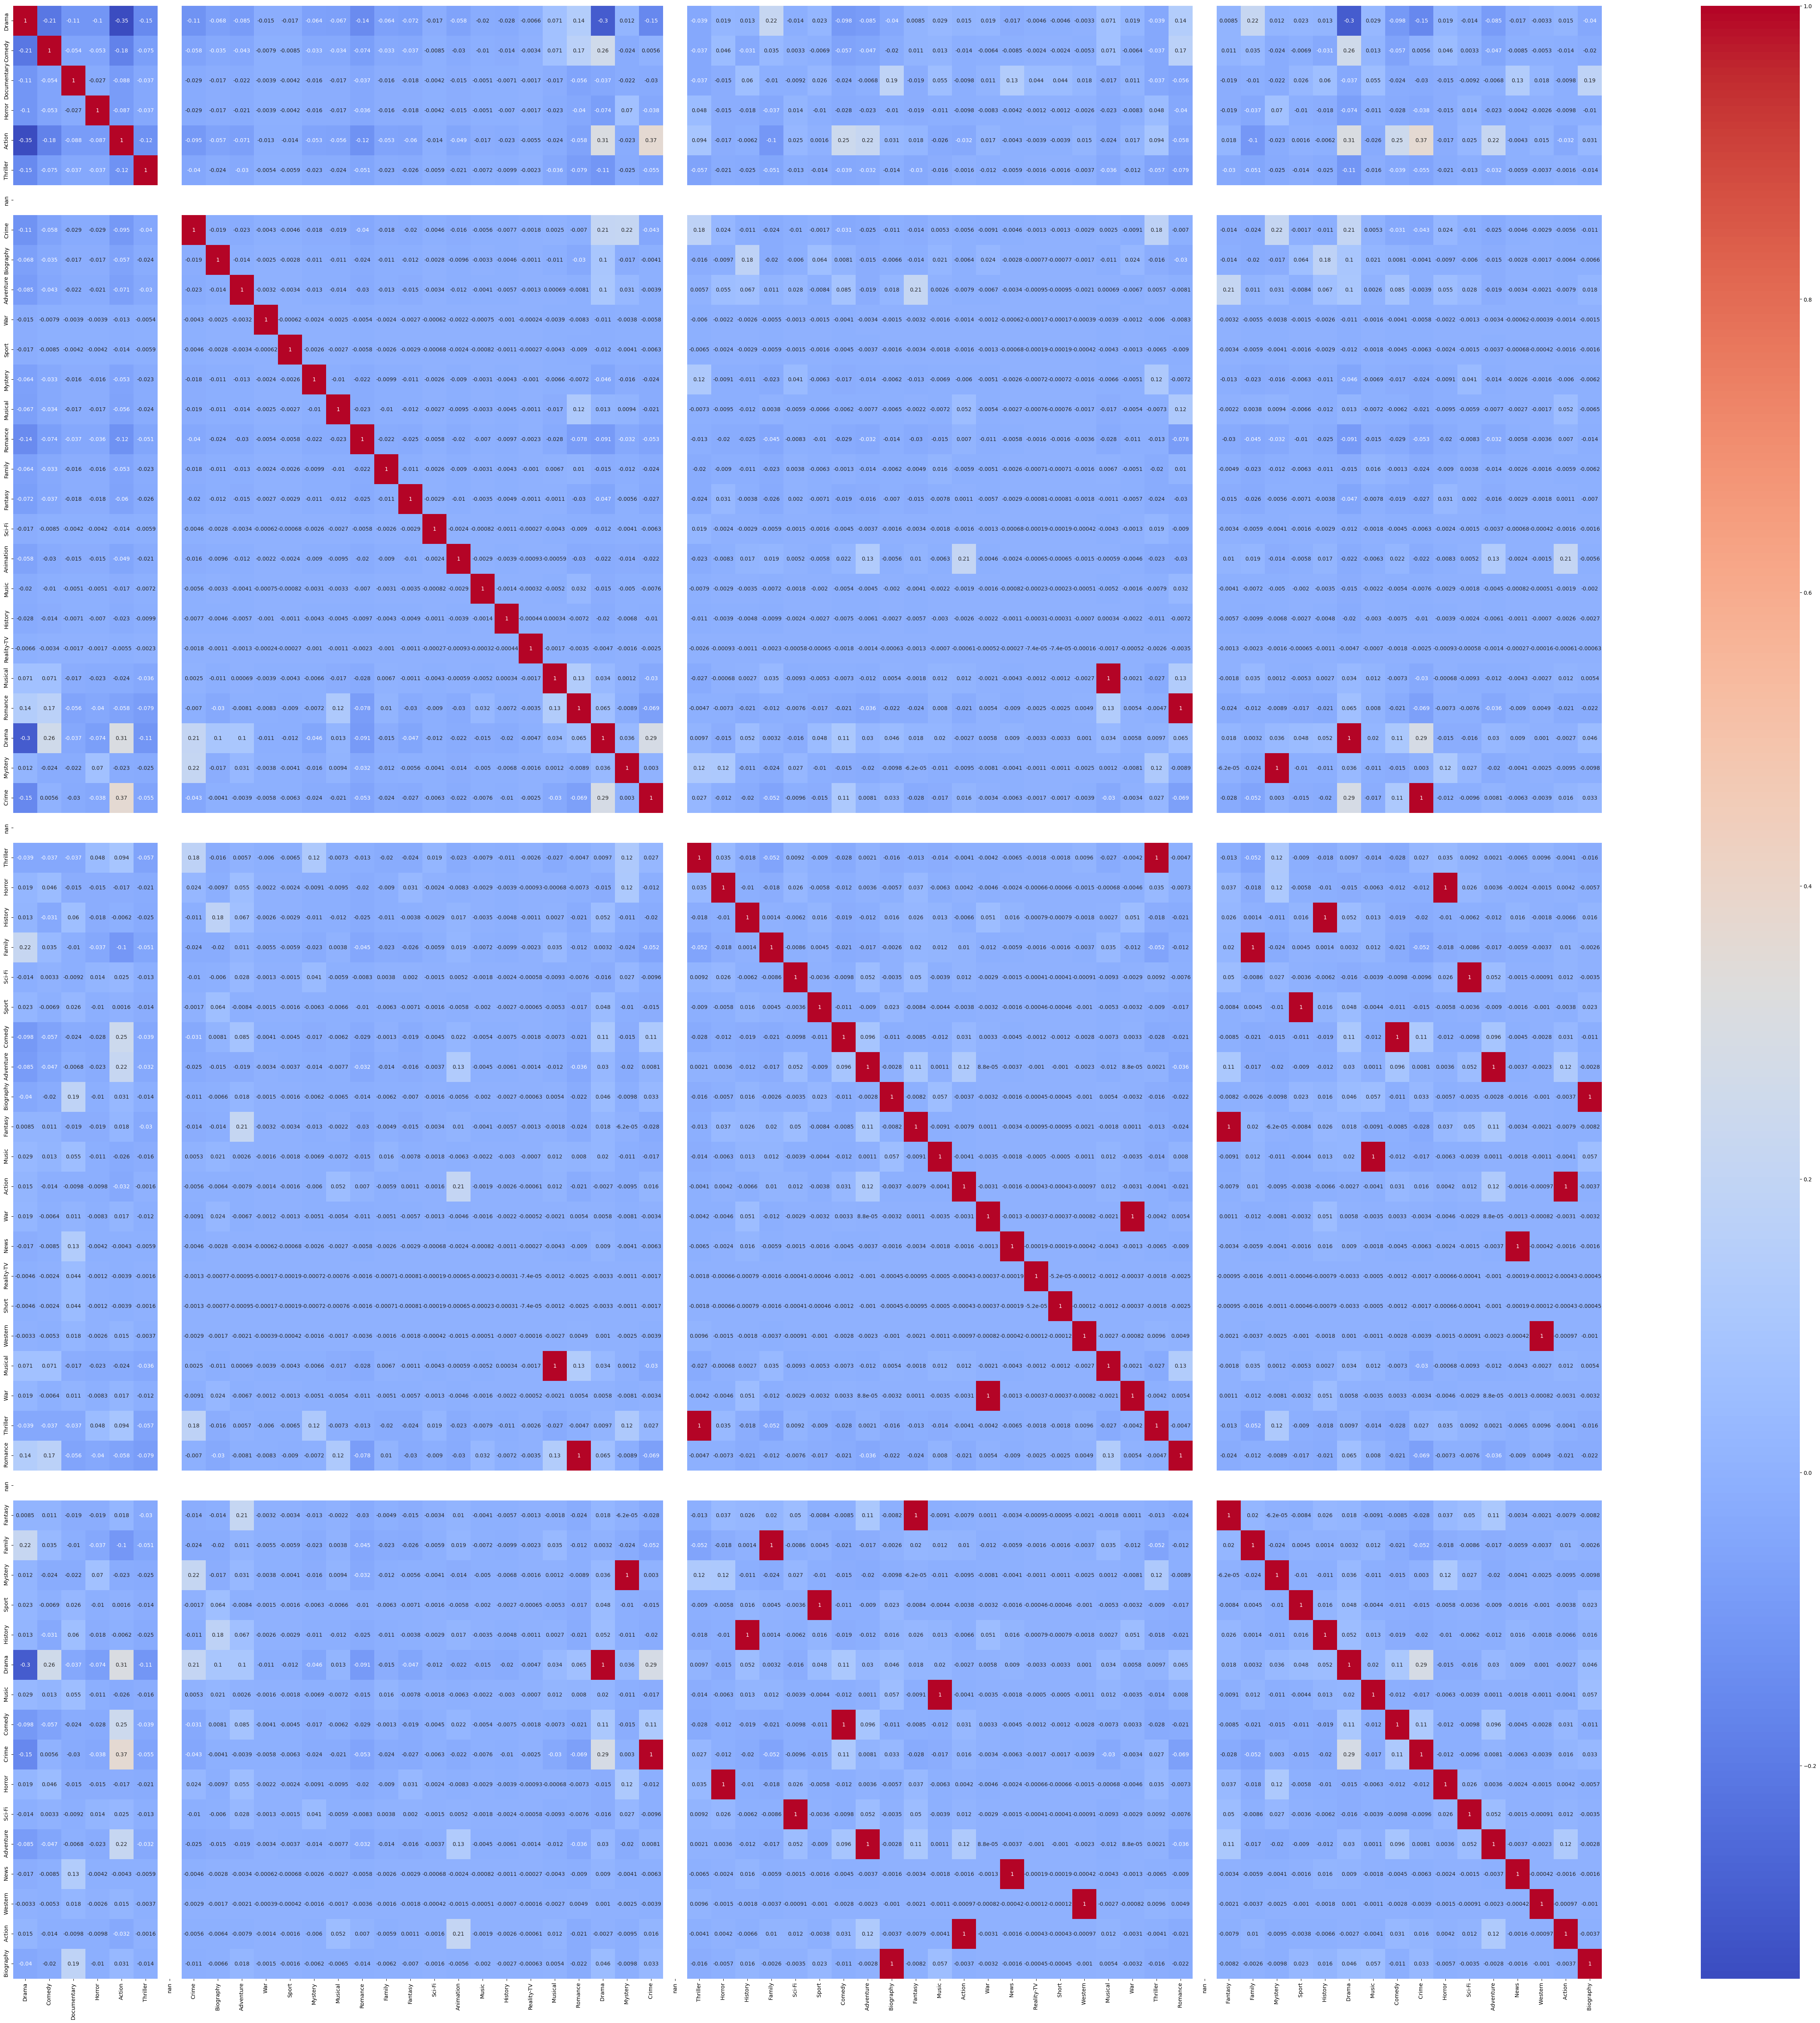

In [86]:
plt.figure(figsize=(66,66))
corr = df[g_l].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.ylim() #plotting the heatmap of only genre

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         19229 non-null  object 
 1   Year         18521 non-null  float64
 2   Duration     19229 non-null  float64
 3   Rating       19230 non-null  object 
 4   Votes        19229 non-null  float64
 5   Director     18603 non-null  object 
 6   Actor 1      17221 non-null  object 
 7   Actor 2      16247 non-null  object 
 8   Actor 3      15322 non-null  object 
 9   Genre_1      16870 non-null  object 
 10  Genre_2      7672 non-null   object 
 11  Genre_3      4017 non-null   object 
 12  Drama        19230 non-null  int64  
 13  Comedy       19230 non-null  int64  
 14  Documentary  19230 non-null  int64  
 15  Horror       19230 non-null  int64  
 16  Action       19230 non-null  int64  
 17  Thriller     19230 non-null  int64  
 18  nan          19230 non-null  int64  
 19  Crim

In [88]:
#selecting the appropriate columns for training purpose
df2 = df[['Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre_1','Genre_2','Genre_3', 'Drama','Comedy','Music','History','Reality-TV','Action','War','Sci-Fi','Family','Documentary','Horror','Action','Thriller','Romance','Crime','Biography','Adventure','War','Mystery','Sport','Fantasy', 'Adventure', 'Thriller', 'Biography', 'Family', 'Sport',  'Romance', 'Crime', 'Action', 'Comedy', 'History','Musical','Rating']]
df2.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3,...,Biography,Family,Sport,Romance,Crime,Action,Comedy,History,Musical,Rating
0,NaN,130.0,36.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None,...,0,0,0,0,0,0,0,0,0,6.8
1,2019.0,109.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,...,0,0,0,0,0,0,0,0,0,7.0
2,2021.0,90.0,36.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None,...,0,0,0,0,0,0,0,0,0,6.8
3,2019.0,110.0,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,...,0,0,0,0,0,0,1,0,0,4.4
4,2010.0,105.0,36.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None,...,0,0,0,0,0,0,0,0,0,6.8


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19230 entries, 0 to 19229
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         18521 non-null  float64
 1   Duration     19229 non-null  float64
 2   Votes        19229 non-null  float64
 3   Director     18603 non-null  object 
 4   Actor 1      17221 non-null  object 
 5   Actor 2      16247 non-null  object 
 6   Actor 3      15322 non-null  object 
 7   Genre_1      16870 non-null  object 
 8   Genre_2      7672 non-null   object 
 9   Genre_3      4017 non-null   object 
 10  Drama        19230 non-null  int64  
 11  Comedy       19230 non-null  int64  
 12  Music        19230 non-null  int64  
 13  History      19230 non-null  int64  
 14  Reality-TV   19230 non-null  int64  
 15  Action       19230 non-null  int64  
 16  War          19230 non-null  int64  
 17  Sci-Fi       19230 non-null  int64  
 18  Family       19230 non-null  int64  
 19  Docu

In [95]:
df2.to_parquet('df2.parquet')
df2 = pd.read_parquet('df2.parquet')

ValueError: Duplicate column names found: ['Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre_1', 'Genre_2', 'Genre_3', 'Drama', 'Comedy', 'Music', 'History', 'Reality-TV', 'Action', 'War', 'Sci-Fi', 'Family', 'Documentary', 'Horror', 'Action', 'Thriller', 'Romance', 'Crime', 'Biography', 'Adventure', 'War', 'Mystery', 'Sport', 'Fantasy', 'Adventure', 'Thriller', 'Biography', 'Family', 'Sport', 'Romance', 'Crime', 'Action', 'Comedy', 'History', 'Musical', 'Rating']

In [96]:
duplicate_columns = df2.columns[df2.columns.duplicated()].tolist()

In [97]:
df2 = df2.loc[:, ~df2.columns.duplicated()] #removing duplicate columns

In [98]:
df2.to_parquet('df2.parquet')
df2 = pd.read_parquet('df2.parquet')

In [99]:
#selecting the features and targets for modelling purpose
X = df2.drop(columns=['Rating'],axis=1)
y = df2['Rating']

In [100]:
#Applying One-hot encoder for converting the features 'X' into numerical values
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

In [101]:
#applying label encoder for converting categorical columns of target into numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [103]:
# Splitting the data into 85% training and 15% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.15, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression  #applying linear regression model after removal of duplicate data and putting data into parquet form
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
accuracy = r2_score(y_test, pred)
accuracy

-2.919353765012288

##very bad model

In [106]:

from sklearn.ensemble import RandomForestRegressor  #training the model with random forest regressor with n_estimators 10

regressor = RandomForestRegressor(n_estimators = 10)


In [107]:

# Train the model
regressor.fit(X_train, y_train)

# Test the model
accuracy = regressor.score(X_test, y_test)
accuracy

Test Accuracy: 0.5414146324973069


better accuracy: 54.14%